# <span style="color:darkred">3. K-Means Kümeleme Ödevi (dava.csv)</span> 

# <span style="color:darkred">Görevler:</span>

### 1. Kümeleme için uygun özellikleri seçin.

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df = pd.read_csv("C:/Users/Nur/Documents/dava.csv")
features = df[['Case Duration (Days)', 'Number of Witnesses', 'Legal Fees (USD)', 
               'Number of Evidence Items', 'Severity']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

### 2. Elbow yöntemi ile optimal küme sayısını belirleyin.

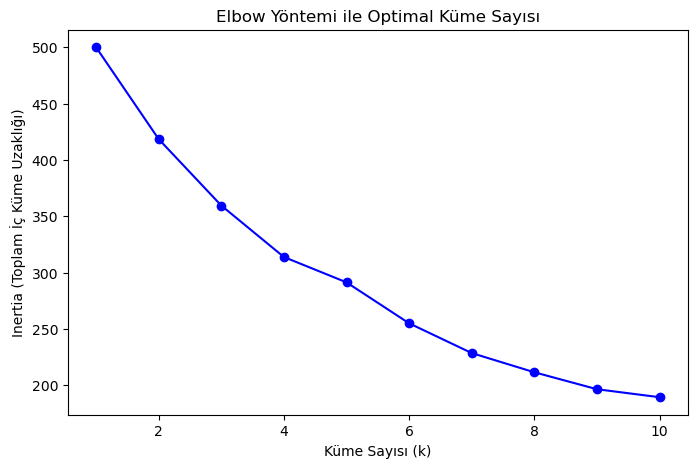

In [2]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel("Küme Sayısı (k)")
plt.ylabel("Inertia (Toplam İç Küme Uzaklığı)")
plt.title("Elbow Yöntemi ile Optimal Küme Sayısı")
plt.show()

In [3]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters

### 3. K-Means algoritması ile veriyi kümeleyin.

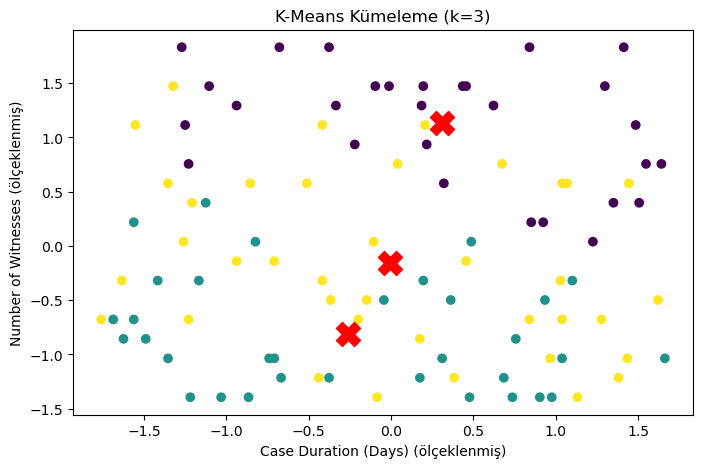

In [4]:
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='red', marker='X')
plt.xlabel('Case Duration (Days) (ölçeklenmiş)')
plt.ylabel('Number of Witnesses (ölçeklenmiş)')
plt.title(f"K-Means Kümeleme (k={optimal_k})")
plt.show()

<span style="color:red">Analiz:</span> Elbow grafiği incelendiğinde optimal küme sayısının k=3 olduğu görülmüştür. Bu durum, üç kümenin veriyi en uygun şekilde temsil ettiğini göstermektedir. K-Means algoritmasıyla elde edilen kümelerde; dava süresi, tanık sayısı ve yasal ücretler gibi değişkenlerde belirgin farklılıklar gözlemlenmiştir. Örneğin, bir kümede dava süresi kısa ve yasal ücretler düşükken, diğerinde dava süresi uzun ve maliyetler yüksektir. Bu da verinin doğal olarak üç ana gruba ayrıldığını göstermektedir.